In [1]:
#hkb
#__author__="harpreet kaur bargota"
#__email__="harpreet.bargota@agr.gc.ca"
#__Project__="Faba bean Feature extraction pipeline (Step2)"

#References: 
#SegmentAnthing (MetaAI): https://github.com/facebookresearch/segment-anything 
# Reference paper: @article{kirillov2023segany, title={Segment Anything}, author={Kirillov, Alexander and Mintun, Eric and Ravi, Nikhila and Mao, Hanzi and Rolland, Chloe and Gustafson, Laura and Xiao, Tete and Whitehead, Spencer and Berg, Alexander C. and Lo, Wan-Yen and Doll{\'a}r, Piotr and Girshick, Ross},journal={arXiv:2304.02643},year={2023}}
# openCV: https://opencv.org/

In [2]:
import torch
import torchvision
import os
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.5.1+cu124
Torchvision version: 0.20.1+cu124
CUDA is available: True


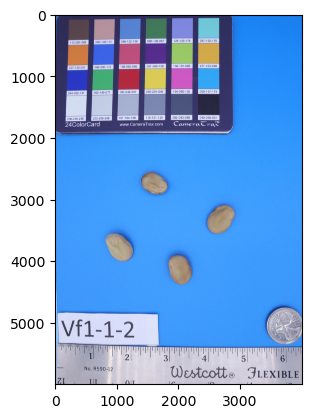

In [4]:
image = cv2.imread(r"data/Faba-Seed-CC_Vf1-1-2.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.axis('on')
plt.show()

In [5]:
print (image.shape)

(6000, 4000, 3)


In [6]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

/home/AGR.GC.CA/bargotah/miniconda3/envs/image/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = tor

In [7]:
masks = mask_generator.generate(image)

RuntimeError: nonzero is not supported for tensors with more than INT_MAX elements,   See https://github.com/pytorch/pytorch/issues/51871

### Crop the image to reduce the size of image

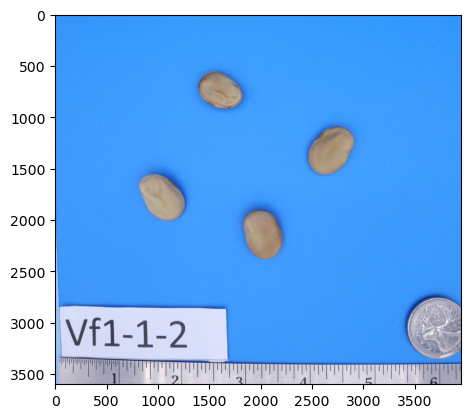

In [9]:
from skimage.util import crop
image = cv2.imread(r"data/Faba-Seed-CC_Vf1-1-2.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = crop(image,((2000, 400), (0, 50), (0,0)))
plt.figure()
plt.imshow(image)
plt.axis('on')
plt.show()

In [23]:
image.shape

(3000, 2000, 3)

In [24]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [25]:
masks = mask_generator.generate(image)

In [26]:
print(len(masks))
print(masks[0].keys())

73
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [27]:
np.random.seed(3)

def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask 
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1) 

    ax.imshow(img)

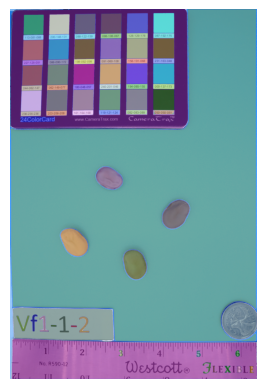

In [28]:
plt.figure()
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

### Resizing an image

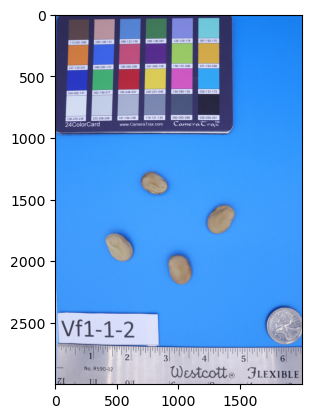

In [29]:
image = cv2.imread(r"data/Faba-Seed-CC_Vf1-1-2.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
 
# # resize image
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

plt.figure()
plt.imshow(image)
plt.axis('on')
plt.show()

In [30]:
image.shape

(3000, 2000, 3)

In [31]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [32]:
masks = mask_generator.generate(image)

In [33]:
print(len(masks))
print(masks[0].keys())

73
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
